
1. does duplicate gameweeks values need to be removed or are they double gameweeksfor gameweeks less than 4. the form will be current gameweeks / 10 or how will it be calculated.
2. the largest sum of total points on average per position. per season or for all season.
3. 2B - how to find the highest form. is it the average or what


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno

In [2]:
# the main dataset

df = pd.read_csv('./cleaned_merged_seasons.csv')  
df.head() # This shows you the first 5 rows of the table!

/tmp/ipykernel_8605/1204461529.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./cleaned_merged_seasons.csv')


,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,2016-17,Aaron Cresswell,DEF,NaN,0,0,0,0,0.0,454,...,2.0,0.0,0,0,0,0,55,False,0,1
1,2016-17,Aaron Lennon,MID,NaN,0,0,6,0,0.3,142,...,1.0,0.0,1,0,0,0,60,True,0,1
2,2016-17,Aaron Ramsey,MID,NaN,0,0,5,0,4.9,16,...,3.0,23.0,2,0,0,0,80,True,0,1
3,2016-17,Abdoulaye Doucouré,MID,NaN,0,0,0,0,0.0,482,...,1.0,0.0,0,0,0,0,50,False,0,1
4,2016-17,Adam Forshaw,MID,NaN,0,0,3,0,1.3,286,...,1.0,0.0,1,0,0,0,45,True,1,1


In [3]:
df['position'].unique()
df[df['position'] == "GKP"]

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
68045,2021-22,Bernd Leno,GKP,Arsenal,0,0,0,0,0.0,1,...,2.0,0.0,0,-422,216,638,45,False,0,37
68072,2021-22,Nick Pope,GKP,Burnley,0,0,20,0,0.0,112,...,1.0,0.0,3,-235,10433,10668,53,False,1,37
68073,2021-22,Nick Pope,GKP,Burnley,0,1,26,0,0.0,112,...,1.0,0.0,5,-235,10433,10668,53,False,0,37
68076,2021-22,Will Norris,GKP,Burnley,0,0,0,0,0.0,114,...,1.0,0.0,0,-10,76,86,43,False,0,37
68077,2021-22,Will Norris,GKP,Burnley,0,0,0,0,0.0,114,...,1.0,0.0,0,-10,76,86,43,False,0,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68861,2021-22,Sam Waller,GKP,Burnley,0,0,0,0,0.0,708,...,1.0,0.0,0,347,513,166,40,False,0,37
68862,2021-22,Sam Waller,GKP,Burnley,0,0,0,0,0.0,708,...,1.0,0.0,0,347,513,166,40,False,0,37
68904,2021-22,David Raya Martin,GKP,Brentford,0,0,18,0,0.0,80,...,2.0,0.0,2,8656,16108,7452,43,False,0,37
68917,2021-22,Ellery Balcombe,GKP,Brentford,0,0,0,0,0.0,92,...,2.0,0.0,0,-3,0,3,40,False,0,37


In [4]:
# the list of teams in each year
temp_df = pd.read_csv('./master_team_list.csv')
temp_df.head() # This shows you the first 5 rows of the table!

,season,team,team_name
0,2016-17,1,Arsenal
1,2016-17,2,Bournemouth
2,2016-17,3,Burnley
3,2016-17,4,Chelsea
4,2016-17,5,Crystal Palace


In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96169 entries, 0 to 96168
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season_x           96169 non-null  object 
 1   name               96169 non-null  object 
 2   position           96169 non-null  object 
 3   team_x             76317 non-null  object 
 4   assists            96169 non-null  int64  
 5   bonus              96169 non-null  int64  
 6   bps                96169 non-null  int64  
 7   clean_sheets       96169 non-null  int64  
 8   creativity         96169 non-null  float64
 9   element            96169 non-null  int64  
 10  fixture            96169 non-null  int64  
 11  goals_conceded     96169 non-null  int64  
 12  goals_scored       96169 non-null  int64  
 13  ict_index          96169 non-null  float64
 14  influence          96169 non-null  float64
 15  kickoff_time       96169 non-null  object 
 16  minutes            961

In [6]:
df.describe()

,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,...,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,yellow_cards,GW
count,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,96169.000000,...,96169.000000,96169.000000,96169.000000,96169.000000,9.616900e+04,9.616900e+04,9.616900e+04,96169.000000,96169.000000,96169.000000
mean,0.041042,0.108715,6.080275,0.106739,4.734000,327.063264,198.413824,0.495887,0.045514,1.715793,...,1.265158,1.516393,5.287598,1.379270,1.677100e+03,1.454716e+04,1.286945e+04,51.352390,0.053167,20.772099
std,0.215378,0.492334,9.850595,0.308783,10.689879,194.313766,108.884200,0.974269,0.233644,3.042551,...,1.229086,1.349184,13.368420,2.542535,6.581628e+04,5.725343e+04,4.840128e+04,12.667432,0.224367,10.941742
min,0.000000,0.000000,-21.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-7.000000,-2.180978e+06,0.000000e+00,0.000000e+00,37.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,159.000000,105.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,-1.374000e+03,4.600000e+01,1.280000e+02,44.000000,0.000000,11.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,318.000000,203.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,-5.800000e+01,4.380000e+02,1.104000e+03,48.000000,0.000000,22.000000
75%,0.000000,0.000000,10.000000,0.000000,2.400000,486.000000,293.000000,1.000000,0.000000,2.500000,...,2.000000,2.000000,2.000000,2.000000,7.900000e+01,5.042000e+03,7.562000e+03,54.000000,0.000000,30.000000
max,4.000000,3.000000,128.000000,1.000000,170.900000,778.000000,380.000000,9.000000,4.000000,32.800000,...,7.000000,9.000000,186.000000,29.000000,1.983733e+06,2.104464e+06,2.233619e+06,133.000000,1.000000,38.000000


In [7]:
df.isnull().sum()

season_x                 0
name                     0
position                 0
team_x               19852
assists                  0
bonus                    0
bps                      0
clean_sheets             0
creativity               0
element                  0
fixture                  0
goals_conceded           0
goals_scored             0
ict_index                0
influence                0
kickoff_time             0
minutes                  0
opponent_team            0
opp_team_name            0
own_goals                0
penalties_missed         0
penalties_saved          0
red_cards                0
round                    0
saves                    0
selected                 0
team_a_score             0
team_h_score             0
threat                   0
total_points             0
transfers_balance        0
transfers_in             0
transfers_out            0
value                    0
was_home                 0
yellow_cards             0
GW                       0
d

<Axes: >

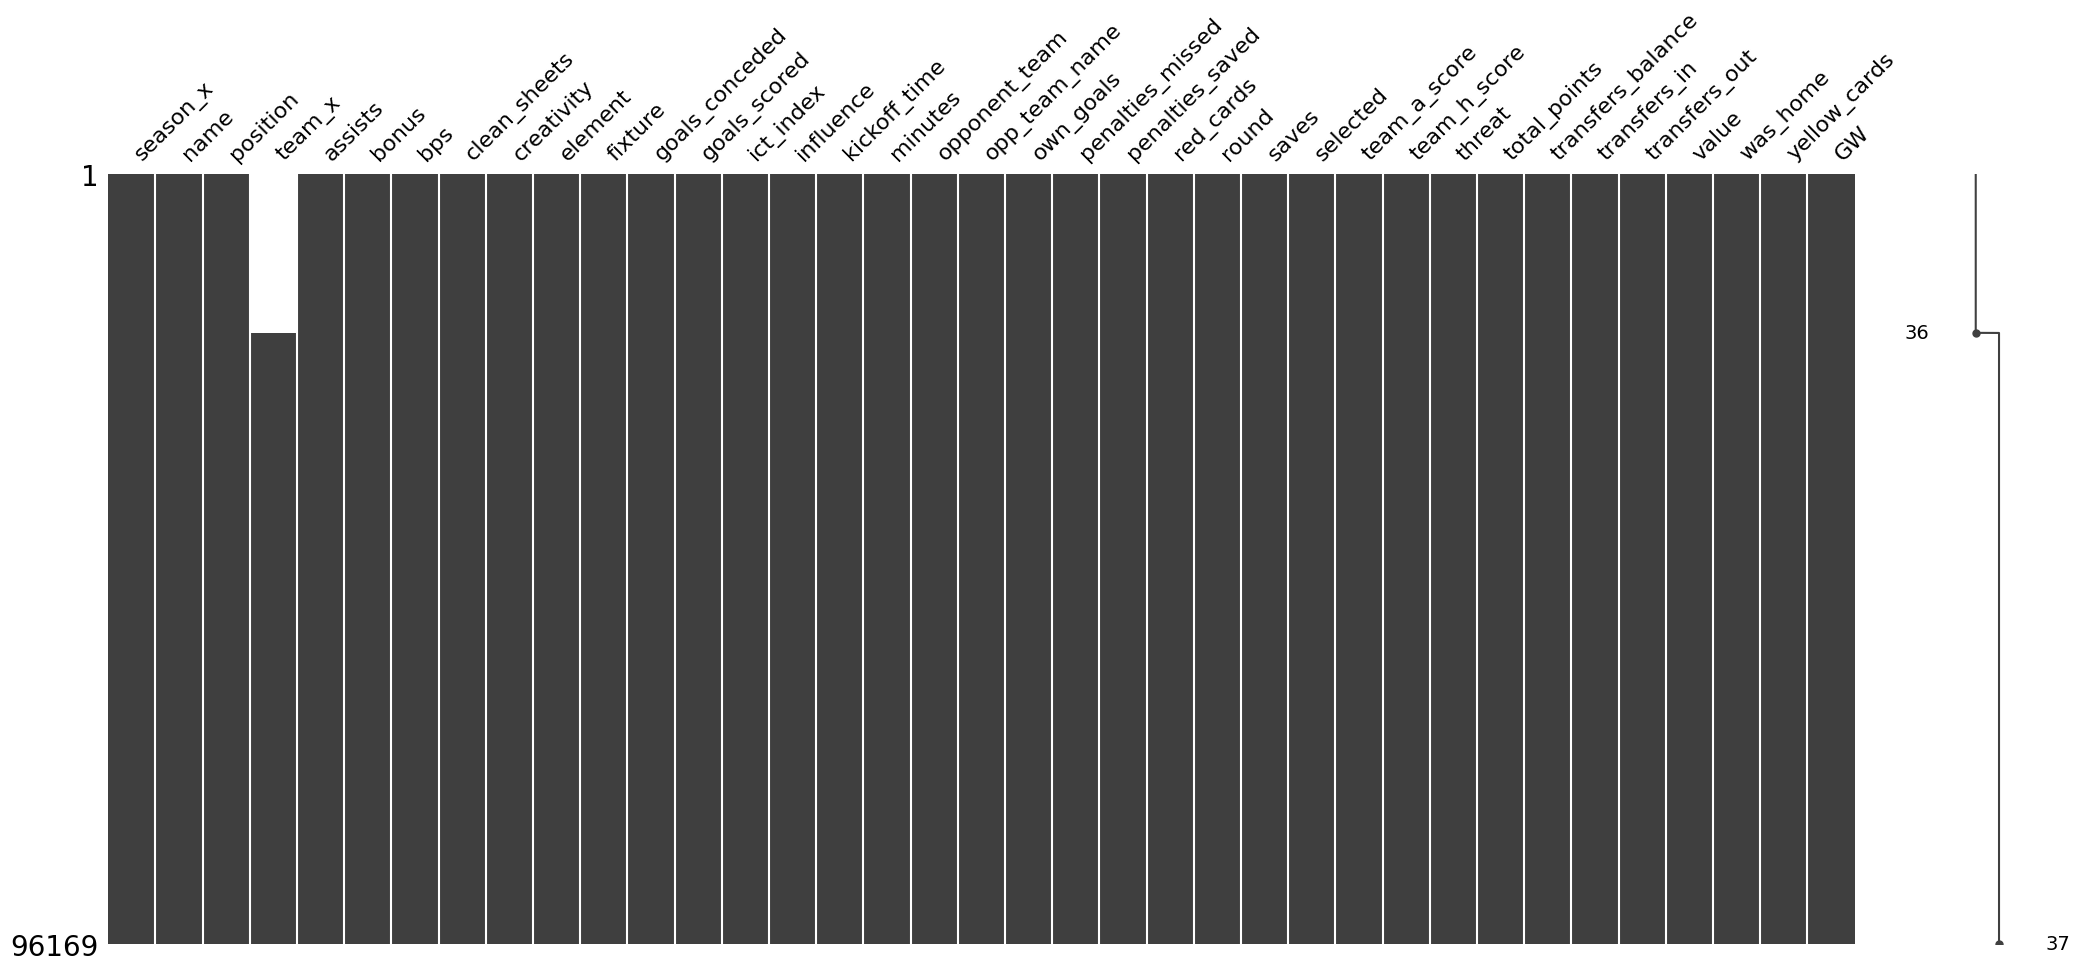

In [8]:
msno.matrix(df)

In [9]:
# listing the list of attributes in the dataset
df.columns.tolist()

['season_x',
 'name',
 'position',
 'team_x',
 'assists',
 'bonus',
 'bps',
 'clean_sheets',
 'creativity',
 'element',
 'fixture',
 'goals_conceded',
 'goals_scored',
 'ict_index',
 'influence',
 'kickoff_time',
 'minutes',
 'opponent_team',
 'opp_team_name',
 'own_goals',
 'penalties_missed',
 'penalties_saved',
 'red_cards',
 'round',
 'saves',
 'selected',
 'team_a_score',
 'team_h_score',
 'threat',
 'total_points',
 'transfers_balance',
 'transfers_in',
 'transfers_out',
 'value',
 'was_home',
 'yellow_cards',
 'GW']

### Filling Null Values in team column

In [10]:
# Fill NaNs in "team_x" within each "name" group using nearest non-null values:
# - Forward fill (ffill) to use the previous value
# - Backward fill (bfill) for any remaining NaNs
df["team_x"] = df.groupby("name")["team_x"].transform(lambda x: x.fillna(method="ffill").fillna(method="bfill"))

/tmp/ipykernel_8605/3244529142.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["team_x"] = df.groupby("name")["team_x"].transform(lambda x: x.fillna(method="ffill").fillna(method="bfill"))


<Axes: >

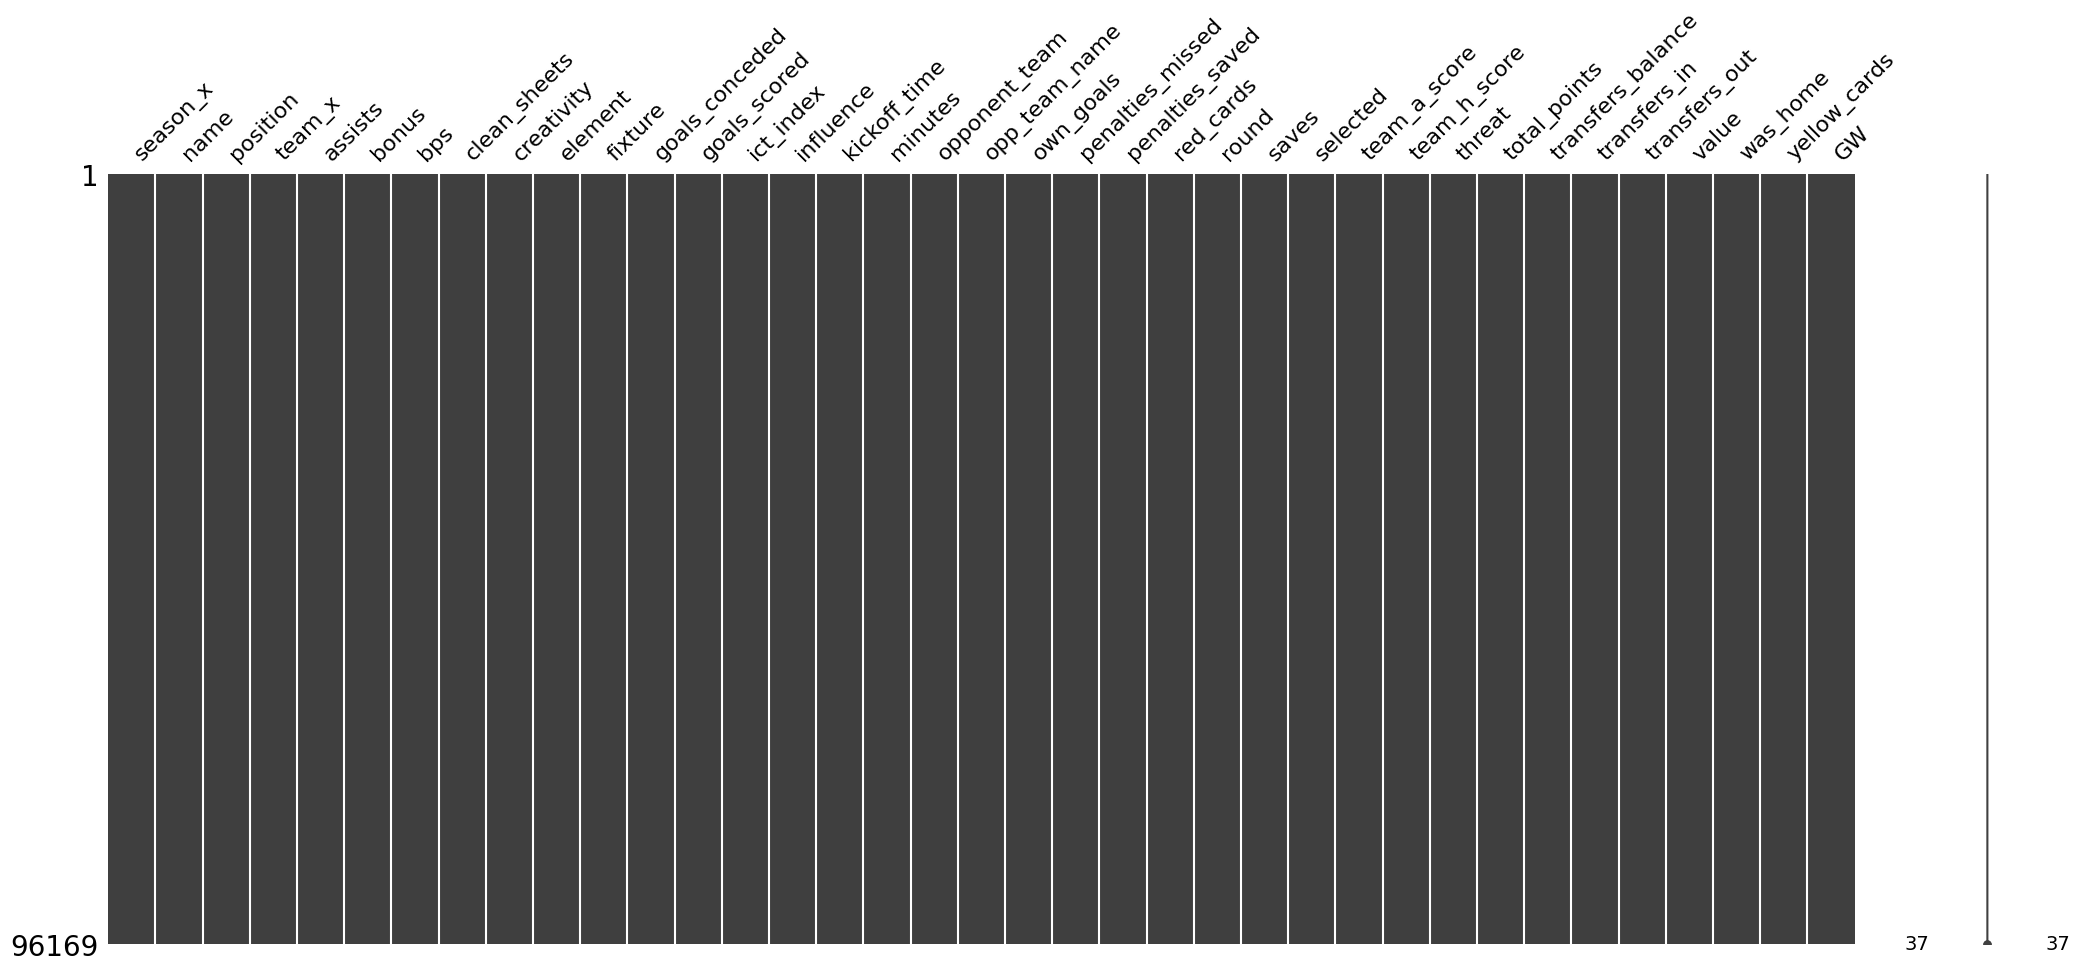

In [11]:
# checking if there is still nan values
msno.matrix(df)

### Chacking for Duplicates

In [12]:
# Check if entire rows are duplicates
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Show duplicate rows
duplicate_rows = df[duplicates]
print(duplicate_rows)

Number of duplicate rows: 0
Empty DataFrame
Columns: [season_x, name, position, team_x, assists, bonus, bps, clean_sheets, creativity, element, fixture, goals_conceded, goals_scored, ict_index, influence, kickoff_time, minutes, opponent_team, opp_team_name, own_goals, penalties_missed, penalties_saved, red_cards, round, saves, selected, team_a_score, team_h_score, threat, total_points, transfers_balance, transfers_in, transfers_out, value, was_home, yellow_cards, GW]
Index: []

[0 rows x 37 columns]


In [13]:
# Check duplicates based on specific columns
duplicates = df.duplicated(subset=['name', 'season_x', 'GW', 'opponent_team', 'team_x'])
print(f"Duplicate players in same season: {duplicates.sum()}")

# Show these duplicates
duplicate_players = df[duplicates]
print(duplicate_players)

Duplicate players in same season: 0
Empty DataFrame
Columns: [season_x, name, position, team_x, assists, bonus, bps, clean_sheets, creativity, element, fixture, goals_conceded, goals_scored, ict_index, influence, kickoff_time, minutes, opponent_team, opp_team_name, own_goals, penalties_missed, penalties_saved, red_cards, round, saves, selected, team_a_score, team_h_score, threat, total_points, transfers_balance, transfers_in, transfers_out, value, was_home, yellow_cards, GW]
Index: []

[0 rows x 37 columns]


In [18]:
# finding duplicate cells

dupe_groups = (
    
    df.groupby(["name", "GW", "season_x"])
      .size()
      .reset_index(name="count")
)

dupe_groups = dupe_groups[dupe_groups["count"] > 1]
print(dupe_groups)

                  name  GW season_x  count
41      Aaron Connolly  22  2021-22      2
46      Aaron Connolly  25  2021-22      2
54      Aaron Connolly  29  2021-22      2
61      Aaron Connolly  33  2021-22      2
161    Aaron Cresswell  19  2020-21      2
...                ...  ..      ...    ...
90212   Çaglar Söyüncü  36  2021-22      2
90215   Çaglar Söyüncü  37  2021-22      2
90235     Ørjan Nyland  19  2020-21      2
90242     Ørjan Nyland  26  2020-21      2
90251     Ørjan Nyland  35  2020-21      2

[5860 rows x 4 columns]


In [15]:
# printing a cell to ensuring that the cell is duplicate

df[(df["name"] == "Çaglar Söyüncü") & (df["GW"] == 36) & (df["season_x"] == "2021-22")]['opp_team_name']

# salah_2017 = df.loc[(df["name"] == "Çaglar Söyüncü") & (df["season_x"] == "2021-22")]
# salah_2017.count()

67360    Everton
67361    Norwich
Name: opp_team_name, dtype: object

In [16]:
# ensuring that there is a cell for each gameweek

salah_2017 = df.loc[(df["name"] == "Mohamed Salah") & (df["season_x"] == "2020-21")]
salah_2017.count()

season_x             38
name                 38
position             38
team_x               38
assists              38
bonus                38
bps                  38
clean_sheets         38
creativity           38
element              38
fixture              38
goals_conceded       38
goals_scored         38
ict_index            38
influence            38
kickoff_time         38
minutes              38
opponent_team        38
opp_team_name        38
own_goals            38
penalties_missed     38
penalties_saved      38
red_cards            38
round                38
saves                38
selected             38
team_a_score         38
team_h_score         38
threat               38
total_points         38
transfers_balance    38
transfers_in         38
transfers_out        38
value                38
was_home             38
yellow_cards         38
GW                   38
dtype: int64

### Create Form Column for Dataset

In [17]:
def calculate_form(df, window=4):
    """
    More explicit version with better handling of edge cases
    """
    # Sort by player, season, and gameweek
    df_sorted = df.sort_values(['name', 'season_x', 'GW']).copy()
    
    # Initialize form column
    df_sorted['form'] = 0.0
    
    # Group by player and season
    for (player, season), group in df_sorted.groupby(['name', 'season_x']):
        # Get the indices for this player-season combination
        indices = group.index
        
        # Calculate form for each gameweek
        for i, idx in enumerate(indices):
            # Get past 4 gameweeks (including current)
            start_idx = max(0, i - 3)  # Go back 3 more to get 4 total
            end_idx = i + 1
            
            # Calculate average of past 4 gameweeks
            past_points = group.iloc[start_idx:end_idx]['total_points']
            avg_points = past_points.mean()
            
            # Divide by 10
            df_sorted.loc[idx, 'form'] = avg_points / 10
    
    return df_sorted

# Apply the function
df = calculate_form_explicit(df)

<Axes: >

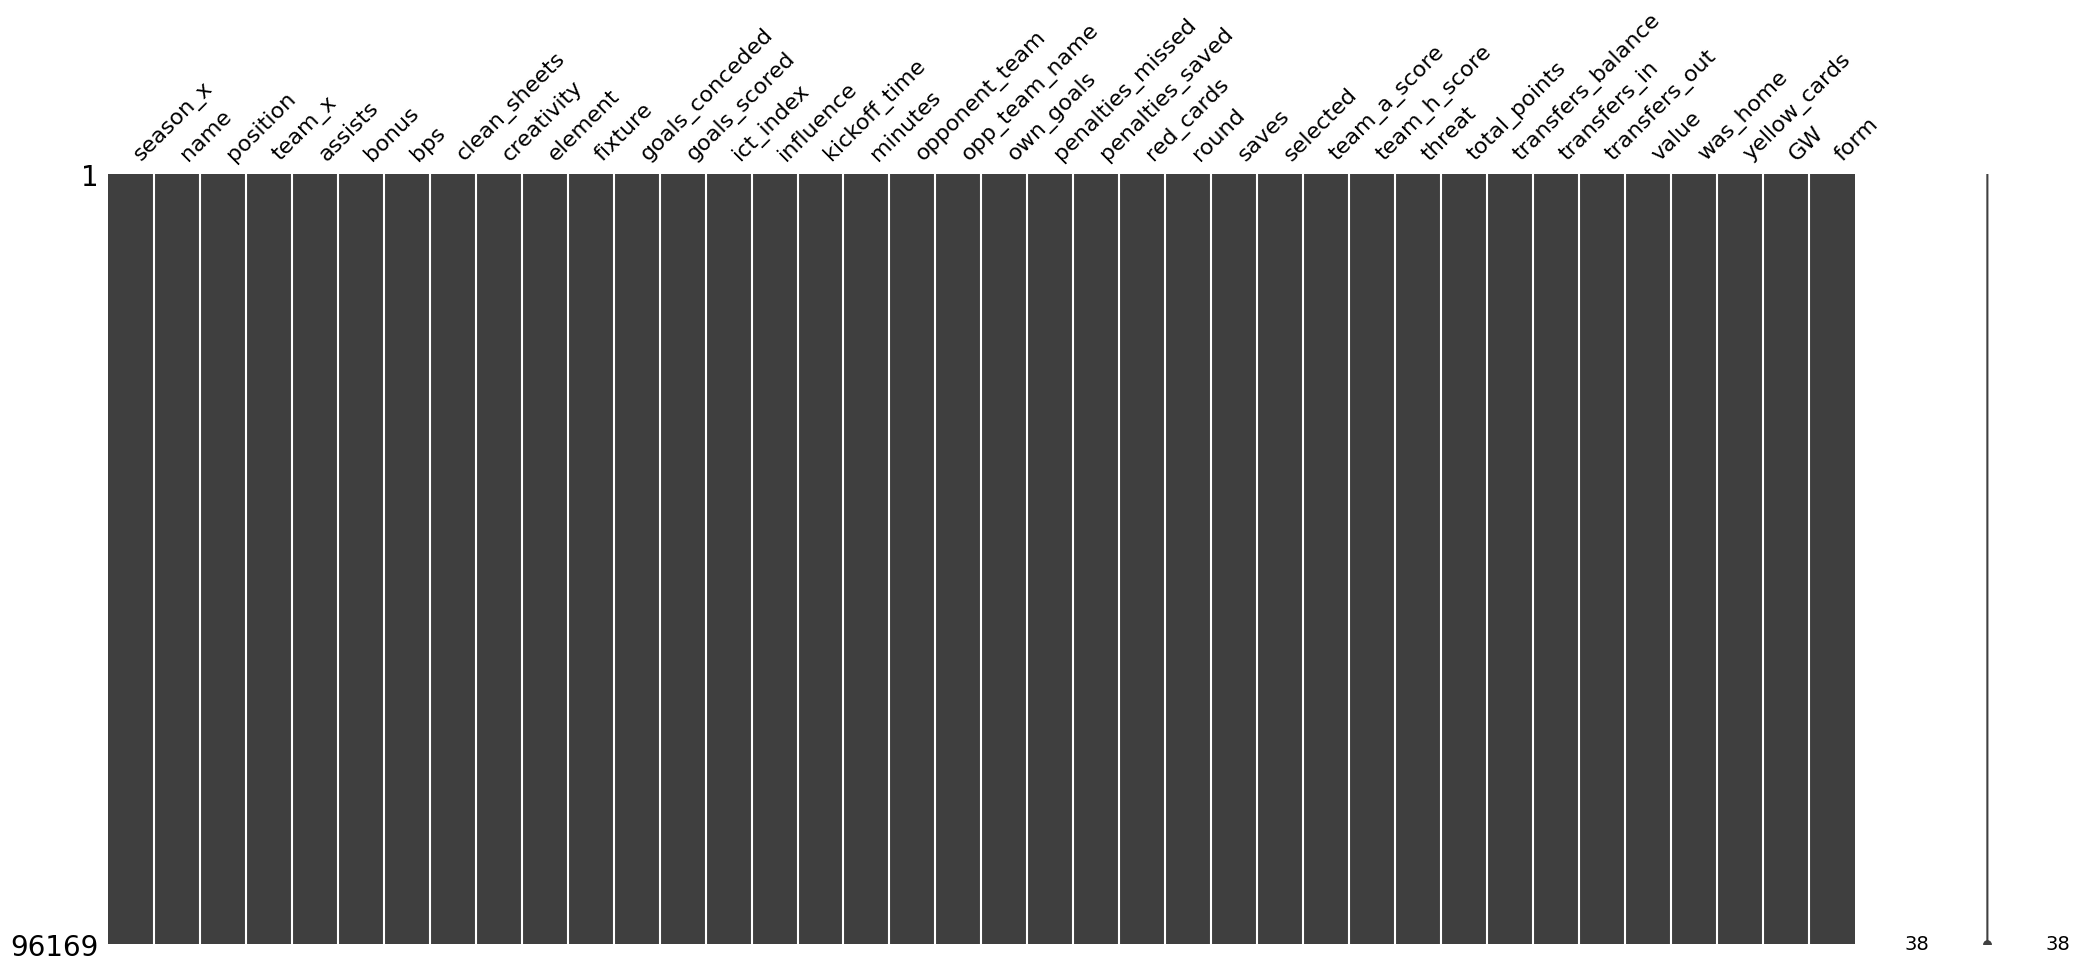

In [99]:
msno.matrix(df)

In [100]:
df[['name','team_x','GW','total_points','form']].head(50)

,name,team_x,GW,total_points,form
19852,Aaron Connolly,Brighton,1,1,0.000000
20277,Aaron Connolly,Brighton,2,8,0.100000
20816,Aaron Connolly,Brighton,3,2,0.450000
21370,Aaron Connolly,Brighton,4,2,0.366667
21932,Aaron Connolly,Brighton,5,4,0.325000
22519,Aaron Connolly,Brighton,6,0,0.400000
23109,Aaron Connolly,Brighton,7,0,0.200000
23706,Aaron Connolly,Brighton,8,1,0.150000
24306,Aaron Connolly,Brighton,9,0,0.125000
24907,Aaron Connolly,Brighton,10,2,0.025000


In [101]:
df['position'] = df['position'].replace('GKP', 'GK')


# Data Engineering Analysis Questions

## Question A: Which player positions score the largest sum of total points on average across seasons?


In [102]:
# Question A: Position Analysis - Total Points Across Seasons

# First, let's examine the position distribution
print("Available positions in the dataset:")
print(df['position'].value_counts())
print("\nPosition mapping:")
position_mapping = {
    'GK': 'Goalkeeper',
    'DEF': 'Defender', 
    'MID': 'Midfielder',
    'FWD': 'Forward'
}
print(position_mapping)


Available positions in the dataset:
position
MID    39163
DEF    33683
FWD    12669
GK     10654
Name: count, dtype: int64

Position mapping:
{'GK': 'Goalkeeper', 'DEF': 'Defender', 'MID': 'Midfielder', 'FWD': 'Forward'}


In [103]:
# group by season and position and get the sum of total points and the count of players
position_stats = (
    df.groupby(['season_x', 'position'])['total_points']
      .agg(['sum', 'count'])
      .round(2)
      .reset_index()
      .rename(columns={'sum': 'total_points_sum', 'count': 'player_count'})
)

print(position_stats)


   season_x position  total_points_sum  player_count
0   2016-17      DEF              5536          3152
1   2016-17      FWD              3180          1402
2   2016-17       GK              1720           904
3   2016-17      MID              6493          3109
4   2017-18      DEF              7018          4102
5   2017-18      FWD              3462          1643
6   2017-18       GK              2220          1281
7   2017-18      MID              8428          4259
8   2020-21      DEF             10461          8626
9   2020-21      FWD              4538          3113
10  2020-21       GK              2872          2768
11  2020-21      MID             13577          9858
12  2021-22      DEF             10568          8620
13  2021-22      FWD              4269          3398
14  2021-22       GK              2724          2910
15  2021-22      MID             13853         10519
16  2022-23      DEF              9943          9183
17  2022-23      FWD              4430        

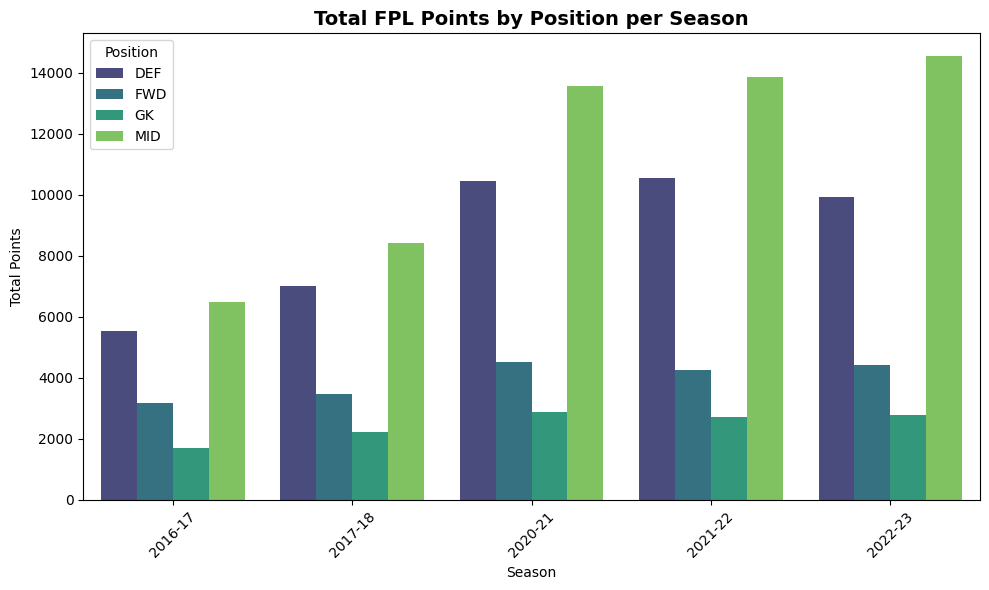

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure seaborn style
# sns.set(style="whitegrid")

# Your DataFrame is called df_position_stats
# Example: df_position_stats = position_stats

plt.figure(figsize=(10, 6))

# Grouped barplot
sns.barplot(
    data=position_stats,
    x='season_x',
    y='total_points_sum',
    hue='position',
    palette='viridis'
)

plt.title('Total FPL Points by Position per Season', fontsize=14, fontweight='bold')
plt.xlabel('Season')
plt.ylabel('Total Points')
plt.legend(title='Position', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [105]:
# Average total points per position across all seasons
avg_points_by_position = (
    position_stats
    .groupby('position')['total_points_sum']
    .mean()
    .round(2)
    .reset_index()
    .sort_values(by='total_points_sum', ascending=False)
)

print(avg_points_by_position)


  position  total_points_sum
3      MID           11384.4
0      DEF            8705.2
1      FWD            3975.8
2       GK            2463.2


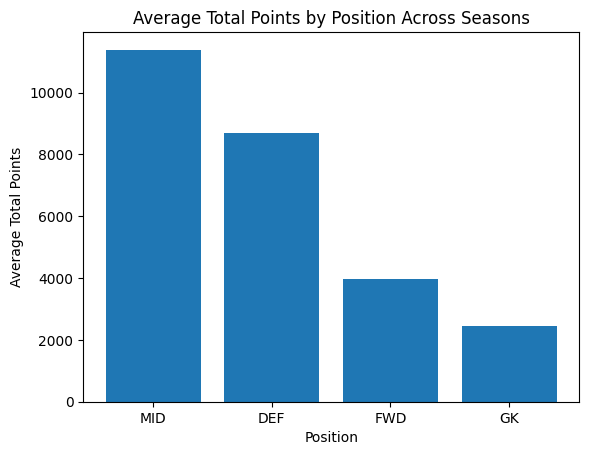

In [106]:
plt.bar(avg_points_by_position['position'], avg_points_by_position['total_points_sum'])
plt.title('Average Total Points by Position Across Seasons')
plt.xlabel('Position')
plt.ylabel('Average Total Points')
plt.show()

### Midfielders consistently have the highest total points across seasons.
### This suggests they contribute the most overall in FPL, on average.

## Question B: Top 5 Players Form Evolution During 2022-23 Season


In [107]:
# Question B: Top 5 Players Analysis for 2022-23 Season

# Filter data for 2022-23 season
df_2022_23 = df[df['season_x'] == '2022-23'].copy()

print(f"Total records for 2022-23 season: {len(df_2022_23)}")
print(f"Unique players in 2022-23: {df_2022_23['name'].nunique()}")
print(f"Gameweeks range: {df_2022_23['GW'].min()} - {df_2022_23['GW'].max()}")

# Check if we have form data
print(f"\nForm column statistics:")
print(df_2022_23['form'].describe())


Total records for 2022-23 season: 26505
Unique players in 2022-23: 777
Gameweeks range: 1 - 38

Form column statistics:
count    26505.000000
mean         0.117056
std          0.172477
min         -0.200000
25%          0.000000
50%          0.025000
75%          0.200000
max          1.500000
Name: form, dtype: float64


In [108]:
# Find top 5 players by total points in 2022-23
player_total_points = df_2022_23.groupby('name')['total_points'].sum().sort_values(ascending=False)
top_5_total_points = player_total_points.head(5)

print("Top 5 Players by Total Points (2022-23):")
for i, (player, points) in enumerate(top_5_total_points.items(), 1):
    print(f"{i}. {player}: {points} points")

# # Find top 5 players by average form in 2022-23
# player_avg_form = df_2022_23.groupby('name')['form'].mean().sort_values(ascending=False)
# top_5_form = player_avg_form.head(5)

# print("\nTop 5 Players by Average Form (2022-23):")
# for i, (player, form) in enumerate(top_5_form.items(), 1):
#     print(f"{i}. {player}: {form:.3f} form")


Top 5 Players by Total Points (2022-23):
1. Erling Haaland: 272 points
2. Harry Kane: 263 points
3. Mohamed Salah: 239 points
4. Martin Ødegaard: 212 points
5. Marcus Rashford: 205 points


In [109]:
# # Compare the two lists
# print("Comparison Analysis:")
# print("\nPlayers in both top 5 lists:")
# common_players = set(top_5_total_points.index) & set(top_5_form.index)
# for player in common_players:
#     total_rank = list(top_5_total_points.index).index(player) + 1
#     form_rank = list(top_5_form.index).index(player) + 1
#     print(f"- {player}: #{total_rank} in total points, #{form_rank} in form")

# print("\nPlayers only in top 5 total points:")
# only_total_points = set(top_5_total_points.index) - set(top_5_form.index)
# for player in only_total_points:
#     print(f"- {player}")

# print("\nPlayers only in top 5 form:")
# only_form = set(top_5_form.index) - set(top_5_total_points.index)
# for player in only_form:
#     print(f"- {player}")


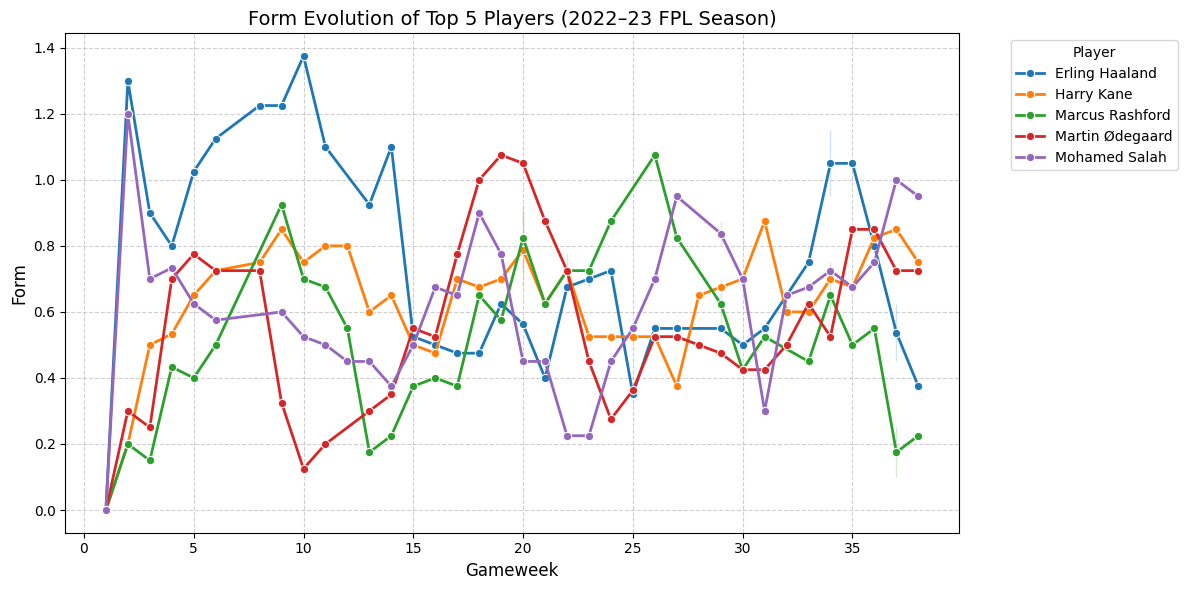

In [110]:
# Visualization for Question B - Form Evolution Analysis

# --- 1️⃣ Filter dataset for 2022–23 season only ---
df_2022_23 = df[df['season_x'] == '2022-23']

# --- 2️⃣ Get top 5 players by total points ---
top_5_players = top_5_total_points.index  # from your code

# --- 3️⃣ Filter only those players ---
top5_data = df_2022_23[df_2022_23['name'].isin(top_5_players)]

# --- 4️⃣ Sort by event (gameweek) for clean plotting ---
top5_data = top5_data.sort_values(by=['GW', 'name'])

# --- 5️⃣ Plot form evolution ---
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=top5_data,
    x='GW', y='form',
    hue='name',
    marker='o',
    linewidth=2
)

# --- 6️⃣ Add labels and title ---
plt.title('Form Evolution of Top 5 Players (2022–23 FPL Season)', fontsize=14)
plt.xlabel('Gameweek', fontsize=12)
plt.ylabel('Form', fontsize=12)
plt.legend(title='Player', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [111]:
# Get top 5 form values across all seasons with player information
top_5_form_all_seasons = df[df['season_x'] == '2022-23'][['name', 'season_x', 'team_x', 'GW', 'form']].sort_values('form', ascending=False).head(5)

print("Top 5 Form Values Across All Seasons:")
print(top_5_form_all_seasons)

Top 5 Form Values Across All Seasons:
                   name season_x     team_x  GW   form
70240      Fabian Schär  2022-23  Newcastle   2  1.500
70658       Pascal Groß  2022-23   Brighton   2  1.500
74402    Erling Haaland  2022-23   Man City  10  1.375
70312    Erling Haaland  2022-23   Man City   2  1.300
70743  Dejan Kulusevski  2022-23      Spurs   2  1.300


In [112]:
# Just the form values and player names
top_5_form_values = df[df['season_x'] == '2022-23'][['name', 'form']].sort_values('form', ascending=False).head(5)
print("Top 5 Form Values Across All Seasons:")
print(top_5_form_values)

Top 5 Form Values Across All Seasons:
                   name   form
70240      Fabian Schär  1.500
70658       Pascal Groß  1.500
74402    Erling Haaland  1.375
70312    Erling Haaland  1.300
70743  Dejan Kulusevski  1.300


In [113]:
df.head()

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,form
19852,2020-21,Aaron Connolly,FWD,Brighton,0,0,-3,0,0.3,78,...,32.0,1,0,0,0,55,True,0,1,0.000000
20277,2020-21,Aaron Connolly,FWD,Brighton,0,2,27,1,11.3,78,...,23.0,8,-1161,5332,6493,55,False,0,2,0.100000
20816,2020-21,Aaron Connolly,FWD,Brighton,0,0,2,0,12.1,78,...,8.0,2,13526,26823,13297,55,True,0,3,0.450000
21370,2020-21,Aaron Connolly,FWD,Brighton,0,0,7,0,0.3,78,...,4.0,2,-1311,10399,11710,55,False,0,4,0.366667
21932,2020-21,Aaron Connolly,FWD,Brighton,1,0,13,0,10.3,78,...,2.0,4,-8992,5860,14852,55,False,0,5,0.325000


In [114]:
df[(df['name'] == 'Erling Haaland') & (df['season_x'] == '2022-23')]

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,form
69738,2022-23,Erling Haaland,FWD,Man City,0,3,48,1,4.8,318,...,73.0,13,0,0,0,115,False,0,1,0.000
70312,2022-23,Erling Haaland,FWD,Man City,1,0,16,1,13.3,318,...,23.0,5,1113937,1143813,29876,116,True,0,2,1.300
70894,2022-23,Erling Haaland,FWD,Man City,0,0,28,0,11.9,318,...,70.0,6,227317,368864,141547,117,False,0,3,0.900
71487,2022-23,Erling Haaland,FWD,Man City,0,3,73,0,1.3,318,...,105.0,17,99625,231905,132280,117,True,0,4,0.800
72089,2022-23,Erling Haaland,FWD,Man City,0,3,81,1,0.8,318,...,91.0,17,624916,675165,50249,118,True,0,5,1.025
72697,2022-23,Erling Haaland,FWD,Man City,0,3,32,0,14.8,318,...,79.0,9,782279,802502,20223,119,False,0,6,1.125
73294,2022-23,Erling Haaland,FWD,Man City,0,0,29,1,3.4,318,...,22.0,6,135042,142869,7827,120,False,0,8,1.225
73763,2022-23,Erling Haaland,FWD,Man City,2,3,102,0,45.5,318,...,124.0,23,94190,126753,32563,121,True,0,9,1.225
74402,2022-23,Erling Haaland,FWD,Man City,0,0,23,1,21.0,318,...,73.0,6,272643,277921,5278,122,True,0,10,1.375
75043,2022-23,Erling Haaland,FWD,Man City,0,0,-2,0,13.9,318,...,122.0,2,40632,72323,31691,122,False,0,11,1.100


In [115]:
df.columns.tolist()

['season_x',
 'name',
 'position',
 'team_x',
 'assists',
 'bonus',
 'bps',
 'clean_sheets',
 'creativity',
 'element',
 'fixture',
 'goals_conceded',
 'goals_scored',
 'ict_index',
 'influence',
 'kickoff_time',
 'minutes',
 'opponent_team',
 'opp_team_name',
 'own_goals',
 'penalties_missed',
 'penalties_saved',
 'red_cards',
 'round',
 'saves',
 'selected',
 'team_a_score',
 'team_h_score',
 'threat',
 'total_points',
 'transfers_balance',
 'transfers_in',
 'transfers_out',
 'value',
 'was_home',
 'yellow_cards',
 'GW',
 'form']

## Summary and Conclusions


# Data Cleaning

In [116]:
df_filtered = df[[
    'season_x', 'name', 'position', 'team_x', 'GW', 'round',
    'minutes', 'goals_scored', 'assi'
    'sts', 'clean_sheets',
    'bonus', 'creativity', 'influence', 'threat', 'ict_index',
    'total_points', 'value', 'selected', 'was_home', 'opp_team_name'
]]

df_filtered = df_filtered.drop_duplicates()

# 🧩 3️⃣ Handle missing values (optional — depends on your analysis)
df_filtered = df_filtered.dropna(subset=['total_points', 'position', 'team_x'])

# 🧩 4️⃣ Reset index for clean display
df_filtered = df_filtered.reset_index(drop=True)

print("✅ Cleaned dataset shape:", df_filtered.shape)
print("✅ Columns kept:", df_filtered.columns.tolist())

✅ Cleaned dataset shape: (96169, 20)
✅ Columns kept: ['season_x', 'name', 'position', 'team_x', 'GW', 'round', 'minutes', 'goals_scored', 'assists', 'clean_sheets', 'bonus', 'creativity', 'influence', 'threat', 'ict_index', 'total_points', 'value', 'selected', 'was_home', 'opp_team_name']


In [117]:
df_filtered = df.copy()

In [118]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96169 entries, 19852 to 43705
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season_x           96169 non-null  object 
 1   name               96169 non-null  object 
 2   position           96169 non-null  object 
 3   team_x             96169 non-null  object 
 4   assists            96169 non-null  int64  
 5   bonus              96169 non-null  int64  
 6   bps                96169 non-null  int64  
 7   clean_sheets       96169 non-null  int64  
 8   creativity         96169 non-null  float64
 9   element            96169 non-null  int64  
 10  fixture            96169 non-null  int64  
 11  goals_conceded     96169 non-null  int64  
 12  goals_scored       96169 non-null  int64  
 13  ict_index          96169 non-null  float64
 14  influence          96169 non-null  float64
 15  kickoff_time       96169 non-null  object 
 16  minutes            9616

### Drop Popularity/Manager Decision Columns

According to the research scope, we should drop columns related to player popularity and fantasy manager decisions, keeping only performance-based metrics.

In [119]:
# Columns to drop (popularity and manager decision metrics)
columns_to_drop = [
    'selected',           # Number of managers who selected the player
    'transfers_in',       # Number of managers who transferred player in
    'transfers_out',      # Number of managers who transferred player out
    'transfers_balance'   # Net transfers (popularity metric)
]

# Drop the columns
df_filtered = df_filtered.drop(columns=columns_to_drop, errors='ignore')

print(f"✅ Original dataset: {df_filtered.shape[1]} columns")
print(f"✅ Performance-only dataset: {df_filtered.shape[1]} columns")
print(f"✅ Dropped: {len(columns_to_drop)} columns")
print(f"\nRemaining columns ({len(df_filtered.columns)}):")
print(df_filtered.columns.tolist())

✅ Original dataset: 34 columns
✅ Performance-only dataset: 34 columns
✅ Dropped: 4 columns

Remaining columns (34):
['season_x', 'name', 'position', 'team_x', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity', 'element', 'fixture', 'goals_conceded', 'goals_scored', 'ict_index', 'influence', 'kickoff_time', 'minutes', 'opponent_team', 'opp_team_name', 'own_goals', 'penalties_missed', 'penalties_saved', 'red_cards', 'round', 'saves', 'team_a_score', 'team_h_score', 'threat', 'total_points', 'value', 'was_home', 'yellow_cards', 'GW', 'form']


### Encode Categorical Features

We'll use One-Hot Encoding for the `position` column since it's a nominal categorical variable with no ordinal relationship between categories (GK, DEF, MID, FWD).

In [120]:
# Check current position distribution
print("Position distribution:")
print(df_filtered['position'].value_counts())
print(f"\nUnique positions: {df_filtered['position'].unique()}")

Position distribution:
position
MID    39163
DEF    33683
FWD    12669
GK     10654
Name: count, dtype: int64

Unique positions: ['FWD' 'DEF' 'MID' 'GK']


In [121]:
# One-Hot Encode the position column
# Using drop_first=True to avoid multicollinearity (drops one category as reference)
# Convert to int (0/1) for ML model compatibility

position_encoded = pd.get_dummies(df_filtered['position'], prefix='position', drop_first=True, dtype=int)

print("One-Hot Encoded Position Columns:")
print(position_encoded.head(10))
print(f"\nNew columns created: {position_encoded.columns.tolist()}")
print(f"Shape: {position_encoded.shape}")
print(f"Data types: {position_encoded.dtypes.to_dict()}")

One-Hot Encoded Position Columns:
       position_FWD  position_GK  position_MID
19852             1            0             0
20277             1            0             0
20816             1            0             0
21370             1            0             0
21932             1            0             0
22519             1            0             0
23109             1            0             0
23706             1            0             0
24306             1            0             0
24907             1            0             0

New columns created: ['position_FWD', 'position_GK', 'position_MID']
Shape: (96169, 3)
Data types: {'position_FWD': dtype('int64'), 'position_GK': dtype('int64'), 'position_MID': dtype('int64')}


In [122]:
# Add encoded columns to the dataframe and drop original position column
df_encoded = df_filtered.copy()
df_encoded = pd.concat([df_encoded, position_encoded], axis=1)

# Drop the original 'position' column since it's now encoded
df_encoded = df_encoded.drop(columns=['position'])

print("✅ Dataset after One-Hot Encoding:")
print(f"Shape: {df_encoded.shape}")
print(f"\nFirst few rows with encoded positions:")
print(df_encoded[['name', 'team_x', 'GW', 'position_FWD', 'position_GK', 'position_MID', 'total_points']].head(10))

✅ Dataset after One-Hot Encoding:
Shape: (96169, 36)

First few rows with encoded positions:
                 name    team_x  GW  position_FWD  position_GK  position_MID  \
19852  Aaron Connolly  Brighton   1             1            0             0   
20277  Aaron Connolly  Brighton   2             1            0             0   
20816  Aaron Connolly  Brighton   3             1            0             0   
21370  Aaron Connolly  Brighton   4             1            0             0   
21932  Aaron Connolly  Brighton   5             1            0             0   
22519  Aaron Connolly  Brighton   6             1            0             0   
23109  Aaron Connolly  Brighton   7             1            0             0   
23706  Aaron Connolly  Brighton   8             1            0             0   
24306  Aaron Connolly  Brighton   9             1            0             0   
24907  Aaron Connolly  Brighton  10             1            0             0   

       total_points  
1985

## Predictive Modeling Task

### Create Target Variable: upcoming_total_points

For each player in each gameweek, we want to predict their points in the **next** gameweek. This requires shifting the `total_points` column by -1 within each player-season group.

In [123]:
# Create upcoming_total_points by shifting total_points by -1 within each player-season group
# Sort by player, season, and gameweek to ensure proper ordering

df_model = df_encoded.copy()
df_model = df_model.sort_values(by=['name', 'season_x', 'GW']).reset_index(drop=True)

# Shift total_points by -1 to get next week's points
df_model['upcoming_total_points'] = (
    df_model.groupby(['name', 'season_x'])['total_points'].shift(-1)
)

print("✅ Created upcoming_total_points column")
print(f"\nSample data showing current and upcoming points:")
print(df_model[['name', 'season_x', 'GW', 'total_points', 'upcoming_total_points']].head(15))
print(f"\nMissing values in upcoming_total_points: {df_model['upcoming_total_points'].isna().sum()}")

✅ Created upcoming_total_points column

Sample data showing current and upcoming points:
              name season_x  GW  total_points  upcoming_total_points
0   Aaron Connolly  2020-21   1             1                    8.0
1   Aaron Connolly  2020-21   2             8                    2.0
2   Aaron Connolly  2020-21   3             2                    2.0
3   Aaron Connolly  2020-21   4             2                    4.0
4   Aaron Connolly  2020-21   5             4                    0.0
5   Aaron Connolly  2020-21   6             0                    0.0
6   Aaron Connolly  2020-21   7             0                    1.0
7   Aaron Connolly  2020-21   8             1                    0.0
8   Aaron Connolly  2020-21   9             0                    2.0
9   Aaron Connolly  2020-21  10             2                    2.0
10  Aaron Connolly  2020-21  11             2                    1.0
11  Aaron Connolly  2020-21  12             1                    0.0
12  Aaron Conn

<Axes: >

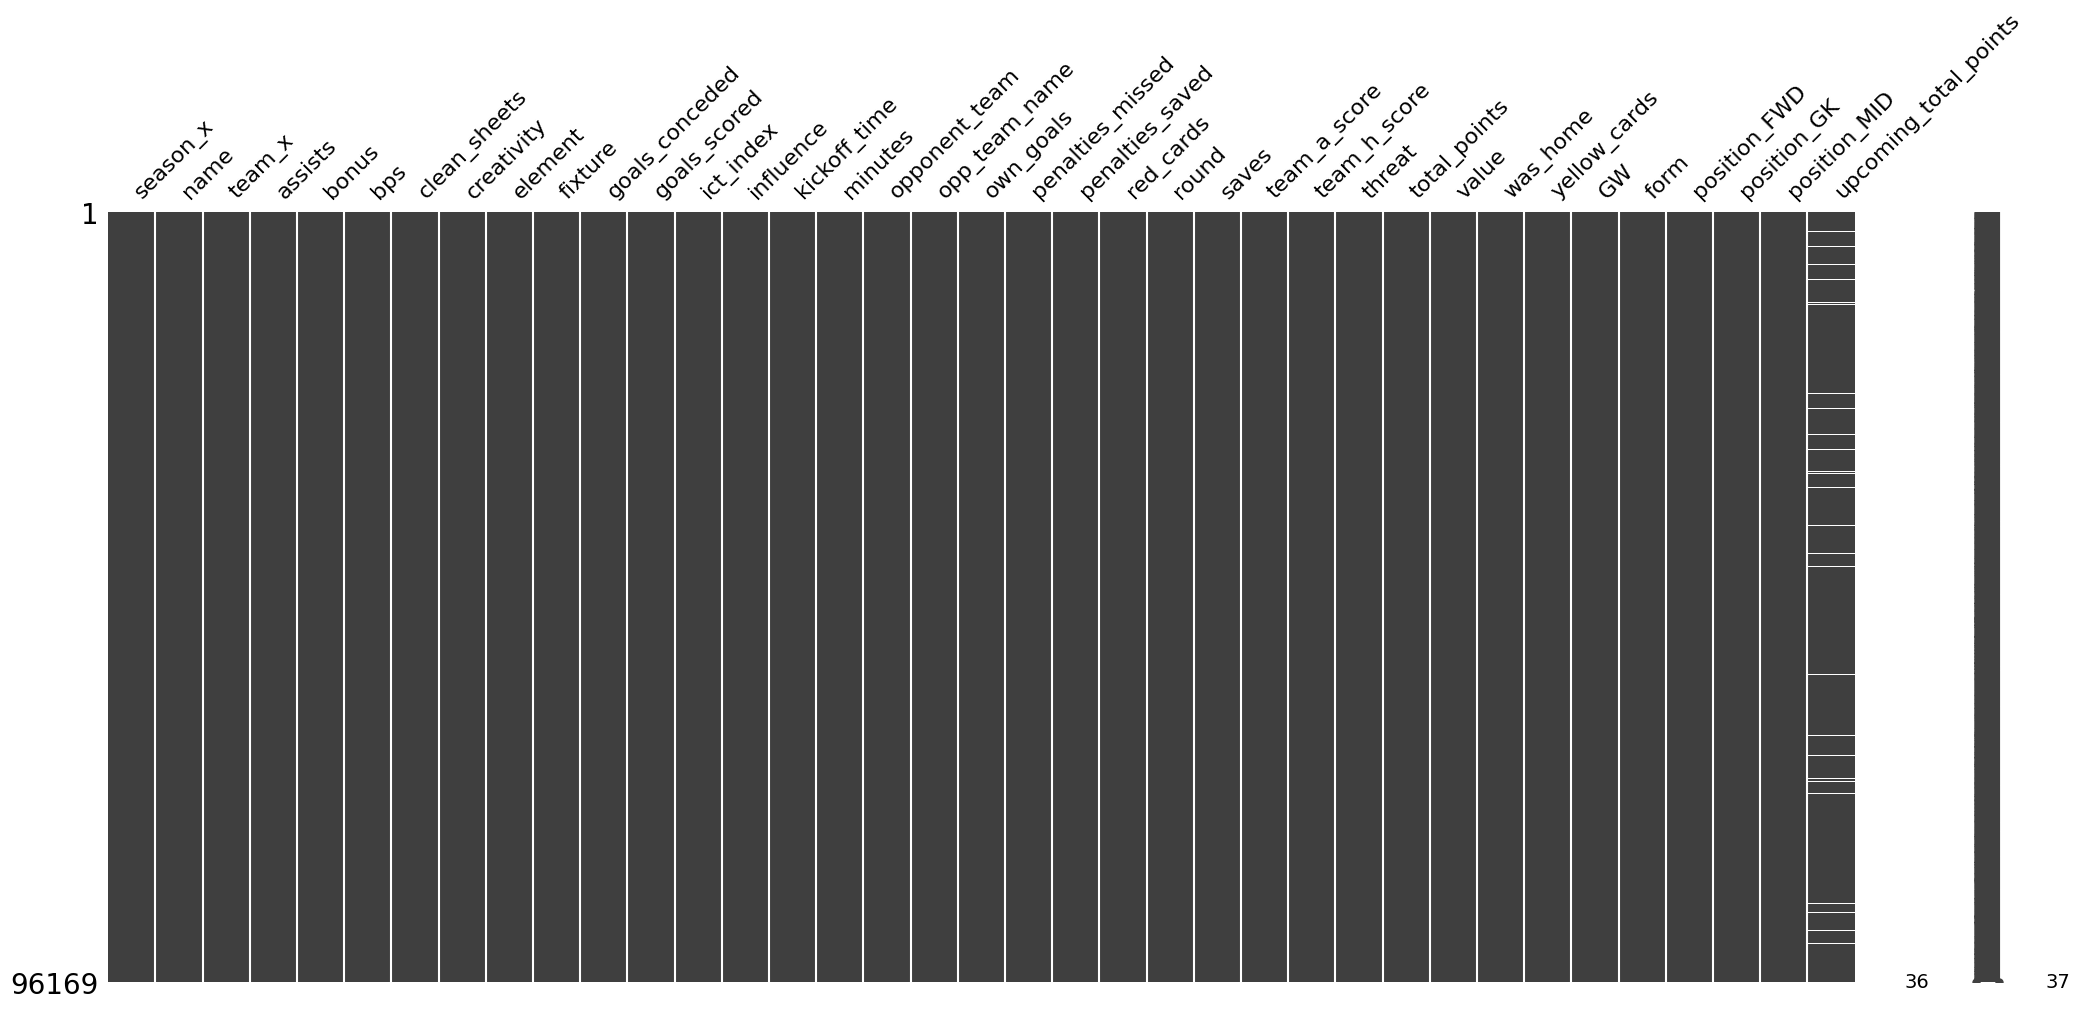

In [124]:
msno.matrix(df_model)

### Define Feature Sets

According to the task requirements:
- **Match-related features**: Events that happen in or around a game
- **Player-related features**: Characteristics describing the player's role or qualities

In [125]:
# Define feature sets based on task requirements

# Match-related features: Things that happen in or around a game
match_features = [
    'minutes',           # Minutes played
    'goals_scored',      # Goals scored in the match
    'assists',           # Assists provided
    'clean_sheets',      # Clean sheet bonus
    'goals_conceded',    # Goals conceded (for defenders/GK)
    'saves',             # Saves made (for GK)
    'bonus',             # Bonus points awarded
    'bps',               # Bonus points system score
    'yellow_cards',      # Yellow cards received
    'red_cards',         # Red cards received
    'own_goals',         # Own goals
    'penalties_missed',  # Penalties missed
    'penalties_saved',   # Penalties saved (for GK)
    'was_home',          # Home/away indicator
    'GW',                # Gameweek number (temporal context)
]

# Player-related features: Characteristics describing player's role or qualities
player_features = [
    'position_FWD',      # Position: Forward
    'position_GK',       # Position: Goalkeeper
    'position_MID',      # Position: Midfielder
    # position_DEF is implicit (all 3 position flags = 0)
    'ict_index',         # Combined ICT index
    'value',             # Player's value/cost
    'form',              # Player's recent form
    'goal_difference'
]

# Combine all features
all_features = match_features + player_features

print("📊 Feature Categories:")
print(f"\nMatch-related features ({len(match_features)}): {match_features}")
print(f"\nPlayer-related features ({len(player_features)}): {player_features}")
print(f"\nTotal features: {len(all_features)}")

📊 Feature Categories:

Match-related features (15): ['minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded', 'saves', 'bonus', 'bps', 'yellow_cards', 'red_cards', 'own_goals', 'penalties_missed', 'penalties_saved', 'was_home', 'GW']

Player-related features (7): ['position_FWD', 'position_GK', 'position_MID', 'ict_index', 'value', 'form', 'goal_difference']

Total features: 22


### Prepare Data for Modeling

Remove rows where `upcoming_total_points` is NaN (last gameweek of each player-season) and split into training/testing sets.

In [127]:
# Create a new feature: goal_difference
df_model['goal_difference'] = df_model.apply(
    lambda row: row['team_h_score'] - row['team_a_score'] if row['was_home'] else row['team_a_score'] - row['team_h_score'],
    axis=1
)

print(df_model[['name', 'GW', 'was_home', 'team_h_score', 'team_a_score', 'goal_difference']].head(10))


             name  GW  was_home  team_h_score  team_a_score  goal_difference
0  Aaron Connolly   1      True           1.0           3.0             -2.0
1  Aaron Connolly   2     False           0.0           3.0              3.0
2  Aaron Connolly   3      True           2.0           3.0             -1.0
3  Aaron Connolly   4     False           4.0           2.0             -2.0
4  Aaron Connolly   5     False           1.0           1.0              0.0
5  Aaron Connolly   6      True           1.0           1.0              0.0
6  Aaron Connolly   7     False           2.0           1.0             -1.0
7  Aaron Connolly   8      True           0.0           0.0              0.0
8  Aaron Connolly   9     False           1.0           2.0              1.0
9  Aaron Connolly  10      True           1.0           1.0              0.0


In [128]:
# Remove rows with missing upcoming_total_points (last gameweek of each player-season)
df_ml = df_model.dropna(subset=['upcoming_total_points']).copy()

# Convert was_home boolean to int if needed
if df_ml['was_home'].dtype == 'bool':
    df_ml['was_home'] = df_ml['was_home'].astype(int)

print(f"✅ Dataset prepared for modeling")
print(f"Original dataset: {len(df_model)} rows")
print(f"After removing NaN targets: {len(df_ml)} rows")
print(f"Rows dropped: {len(df_model) - len(df_ml)}")

# Verify all features exist
missing_features = [f for f in all_features if f not in df_ml.columns]
if missing_features:
    print(f"\n⚠️  Missing features: {missing_features}")
else:
    print(f"\n✅ All {len(all_features)} features are present")

# Check for any remaining NaN values in features
print(f"\nMissing values per feature:")
print(df_ml[all_features].isnull().sum()[df_ml[all_features].isnull().sum() > 0])

✅ Dataset prepared for modeling
Original dataset: 96169 rows
After removing NaN targets: 93387 rows
Rows dropped: 2782

✅ All 22 features are present

Missing values per feature:
Series([], dtype: int64)


In [129]:
# Analyze the NaN values in upcoming_total_points
# These should be the LAST gameweek for each player in each season

nan_rows = df_model[df_model['upcoming_total_points'].isna()]

print(f"Total NaN rows: {len(nan_rows)}")
print(f"\nBreakdown by gameweek:")
print(nan_rows['GW'].value_counts().sort_index())

print(f"\nSample of rows with NaN upcoming_total_points:")
print(nan_rows[['name', 'season_x', 'GW', 'total_points', 'upcoming_total_points']].head(20))

# Check if these are indeed the last gameweeks
print(f"\n🔍 Analysis: Are these the last gameweeks for each player-season?")
for idx in nan_rows.head(5).index:
    row = df_model.loc[idx]
    player_season = df_model[(df_model['name'] == row['name']) & (df_model['season_x'] == row['season_x'])]
    max_gw = player_season['GW'].max()
    print(f"{row['name']} in {row['season_x']}: GW {row['GW']} (max GW: {max_gw})")

Total NaN rows: 2782

Breakdown by gameweek:
GW
38    2782
Name: count, dtype: int64

Sample of rows with NaN upcoming_total_points:
                name season_x  GW  total_points  upcoming_total_points
37    Aaron Connolly  2020-21  38             1                    NaN
75    Aaron Connolly  2021-22  38             0                    NaN
113  Aaron Cresswell  2016-17  38             2                    NaN
151  Aaron Cresswell  2017-18  38             2                    NaN
189  Aaron Cresswell  2020-21  38             6                    NaN
227  Aaron Cresswell  2021-22  38             1                    NaN
265  Aaron Cresswell  2022-23  38             1                    NaN
303     Aaron Hickey  2022-23  38             6                    NaN
341     Aaron Lennon  2016-17  38             0                    NaN
379     Aaron Lennon  2017-18  38             2                    NaN
415     Aaron Lennon  2021-22  38             1                    NaN
453       Aaron

In [ ]:
# Check if there are mid-season NaN values (players who stopped playing before GW 38)
# These would represent injuries, transfers, or players who left mid-season

nan_analysis = df_ml[df_ml['upcoming_total_points'].isna()].copy()

print("=" * 60)
print("ANALYSIS OF NaN VALUES IN upcoming_total_points")
print("=" * 60)

# Check if ALL NaN are at GW 38 (end of season)
print(f"\nTotal NaN values: {nan_analysis.shape[0]}")
print(f"\nGameweek distribution of NaN values:")
print(nan_analysis['GW'].value_counts().sort_index())

# Are there any mid-season NaN values (GW < 38)?
mid_season_nan = nan_analysis[nan_analysis['GW'] < 38]
print(f"\n🔍 Mid-season NaN values (GW < 38): {len(mid_season_nan)}")

if len(mid_season_nan) > 0:
    print("\n⚠️ WARNING: Found mid-season NaN values!")
    print("These represent players whose season ended early (injury, transfer, etc.)")
    print("\nSample of mid-season NaN cases:")
    print(mid_season_nan[['name', 'season_x', 'GW', 'team_x', 'total_points', 'upcoming_total_points']].head(10))
else:
    print("\n✅ All NaN values are at GW 38 (end of season)")
    print("These are expected boundary cases with no 'next week' to predict.")

ANALYSIS OF NaN VALUES IN upcoming_total_points

Total NaN values: 0

Gameweek distribution of NaN values:
Series([], Name: count, dtype: int64)

🔍 Mid-season NaN values (GW < 38): 0

✅ All NaN values are at GW 38 (end of season)
These are expected boundary cases with no 'next week' to predict.


In [ ]:
# NOW let's properly analyze the NaN values in df_model (before dropping)
print("=" * 70)
print("DETAILED ANALYSIS OF NaN VALUES IN upcoming_total_points")
print("=" * 70)

nan_rows_full = df_model[df_model['upcoming_total_points'].isna()].copy()

print(f"\nTotal NaN values: {len(nan_rows_full)} out of {len(df_model)} rows ({len(nan_rows_full)/len(df_model)*100:.2f}%)")

print(f"\n📊 Gameweek distribution of NaN values:")
gw_dist = nan_rows_full['GW'].value_counts().sort_index()
print(gw_dist)

# Check for mid-season NaN (GW < 38)
mid_season_nan_full = nan_rows_full[nan_rows_full['GW'] < 38]
print(f"\n🔍 Mid-season NaN values (GW < 38): {len(mid_season_nan_full)}")

if len(mid_season_nan_full) > 0:
    print("\n⚠️ WARNING: Found mid-season NaN values!")
    print("These likely represent players whose season ended early due to:")
    print("  - Injury")
    print("  - Transfer to another league")
    print("  - End of loan spell")
    print("  - Retirement")
    
    print(f"\nSample of mid-season NaN cases:")
    sample = mid_season_nan_full[['name', 'season_x', 'GW', 'team_x', 'minutes', 'total_points']].head(20)
    print(sample)
    
    print(f"\n💡 Decision needed:")
    print(f"   - DROP: If we can't predict when a season ends early (recommended)")
    print(f"   - IMPUTE: Only if we want to predict 'end of availability' (complex)")
else:
    print("\n✅ ALL NaN values are at GW 38 (end of season)")
    print("These are expected boundary cases - no 'next week' exists.")
    print("Action: DROP these rows (already done in df_ml)")

DETAILED ANALYSIS OF NaN VALUES IN upcoming_total_points

Total NaN values: 2782 out of 96169 rows (2.89%)

📊 Gameweek distribution of NaN values:
GW
38    2782
Name: count, dtype: int64

🔍 Mid-season NaN values (GW < 38): 0

✅ ALL NaN values are at GW 38 (end of season)
These are expected boundary cases - no 'next week' exists.
Action: DROP these rows (already done in df_ml)


### ⚠️ Important: Why We Drop NaN values (Not Impute)

The NaN values in `upcoming_total_points` are **NOT missing data** - they are **structurally impossible values**.

**Analysis Results:**
- Total NaN values: **2,782 (2.89% of dataset)**
- **ALL 2,782 occur at Gameweek 38** (final gameweek of each season)
- **ZERO mid-season NaN values** (no injuries/transfers causing early season ends)

**Why These NaN Values Exist:**
- Each season ends at GW 38 - there is no GW 39
- For each player-season combination, their final gameweek cannot have an "upcoming" value
- This is a natural boundary condition in time-series forecasting

**Why NOT to Impute:**
- ❌ You can't impute what doesn't exist (there is no GW 39)
- ❌ Imputing would create fictional target values
- ❌ It would violate the prediction task logic

**Why We MUST Drop:**
- ✅ These rows have no valid target to predict
- ✅ Training on them would be meaningless
- ✅ This is the correct approach for time-series with boundary conditions
- ✅ No information loss since these are structural impossibilities, not missing data

**Note on Mid-Season Endings:**
If a player's season ended early (injury, transfer), they simply don't have rows for subsequent gameweeks in this dataset. They don't appear as NaN values - they're just absent from later GWs.

In [130]:
# Split data chronologically - use 2022-23 season as test set
# This mimics real-world scenario where we predict future based on past

train_df = df_ml[df_ml['season_x'] != '2022-23'].copy()
test_df = df_ml[df_ml['season_x'] == '2022-23'].copy()

# Prepare X and y for training and testing
X_train = train_df[all_features]
y_train = train_df['upcoming_total_points']

X_test = test_df[all_features]
y_test = test_df['upcoming_total_points']

print("📊 Train/Test Split:")
print(f"Training set: {len(X_train)} samples from seasons before 2022-23")
print(f"Test set: {len(X_test)} samples from 2022-23 season")
print(f"\nFeature matrix shape: {X_train.shape}")
print(f"Target variable shape: {y_train.shape}")
print(f"\nTarget statistics (training):")
print(y_train.describe())

📊 Train/Test Split:
Training set: 67659 samples from seasons before 2022-23
Test set: 25728 samples from 2022-23 season

Feature matrix shape: (67659, 22)
Target variable shape: (67659,)

Target statistics (training):
count    67659.000000
mean         1.449859
std          2.607302
min         -7.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         29.000000
Name: upcoming_total_points, dtype: float64


## Build Regression Models

We'll implement two approaches:
1. **Classic ML Models**: Linear Regression, Random Forest, XGBoost
2. **Neural Network**: Shallow Feed-Forward Neural Network (FFNN)

All models will be evaluated using: MAE, MSE, RMSE, and R²

In [131]:
# Install TensorFlow and XGBoost
%pip install tensorflow xgboost

Note: you may need to restart the kernel to use updated packages.


### ⚠️ After Installing Packages - Run These Cells

Since the kernel was restarted, please re-run these cells in order:
1. **Cell 2**: Import pandas, matplotlib, seaborn, missingno
2. **Cell 3**: Load the main dataset
3. **Cell 46**: Create df_filtered = df.copy()  
4. **Cell 48**: Drop popularity columns
5. **Cell 51**: One-hot encode positions
6. **Cell 52**: Create df_encoded
7. **Cell 55**: Create upcoming_total_points (df_model)
8. **Cell 60**: Prepare df_ml (drop NaN values)
9. **Cell 65**: Train/test split

Or use "Run All Above" on cell 70 to execute all preceding cells automatically.

In [132]:
# Import ML libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# For Neural Network - TensorFlow/Keras
try:
    import tensorflow as tf
    from tensorflow.keras import layers, models, regularizers, optimizers, callbacks
    print("✅ TensorFlow/Keras available")
    tf_available = True
except ImportError as e:
    print(f"⚠️  TensorFlow not installed: {e}")
    print("Will skip Neural Network.")
    tf_available = False
    
# Try XGBoost (optional)
try:
    import xgboost as xgb
    print("✅ XGBoost available")
    xgb_available = True
except ImportError:
    print("⚠️  XGBoost not installed. Will skip XGBoost model.")
    xgb_available = False

print("\n📦 Libraries imported successfully")

⚠️  TensorFlow not installed: No module named 'tensorflow.python'
Will skip Neural Network.
✅ XGBoost available

📦 Libraries imported successfully


In [133]:
# Helper function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    """
    Calculate and display regression metrics
    """
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{'='*60}")
    print(f"📊 {model_name} - Evaluation Metrics")
    print(f"{'='*60}")
    print(f"Mean Absolute Error (MAE):       {mae:.4f}")
    print(f"Mean Squared Error (MSE):        {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE):  {rmse:.4f}")
    print(f"R-squared (R²):                  {r2:.4f}")
    print(f"{'='*60}")
    
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

print("✅ Evaluation function defined")

✅ Evaluation function defined


### Approach 1: Classic Machine Learning Models

In [134]:
# Model 1: Linear Regression
print("🚀 Training Linear Regression...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate
lr_results = evaluate_model(y_test, y_pred_lr, "Linear Regression")

print(f"\n💡 Interpretation:")
print(f"   - On average, predictions are off by {lr_results['MAE']:.2f} points")
print(f"   - Model explains {lr_results['R2']*100:.2f}% of variance in upcoming points")

🚀 Training Linear Regression...

📊 Linear Regression - Evaluation Metrics
Mean Absolute Error (MAE):       1.0699
Mean Squared Error (MSE):        3.8932
Root Mean Squared Error (RMSE):  1.9731
R-squared (R²):                  0.3003

💡 Interpretation:
   - On average, predictions are off by 1.07 points
   - Model explains 30.03% of variance in upcoming points


In [135]:
from sklearn.model_selection import train_test_split

# Use 'upcoming_total_points' as the target variable
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    df_ml[all_features], df_ml['upcoming_total_points'], test_size=0.2, random_state=42
)

In [136]:
# Model 2: Random Forest Regressor
print("🚀 Training Random Forest...")
rf_model = RandomForestRegressor(
    n_estimators=100,      # Number of trees
    max_depth=20,          # Maximum depth of trees
    min_samples_split=20,  # Minimum samples to split a node
    random_state=42,       # For reproducibility
    n_jobs=-1,             # Use all CPU cores
    verbose=1
)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate
rf_results = evaluate_model(y_test, y_pred_rf, "Random Forest")

print(f"\n💡 Interpretation:")
print(f"   - On average, predictions are off by {rf_results['MAE']:.2f} points")
print(f"   - Model explains {rf_results['R2']*100:.2f}% of variance in upcoming points")

🚀 Training Random Forest...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.5s



📊 Random Forest - Evaluation Metrics
Mean Absolute Error (MAE):       1.0772
Mean Squared Error (MSE):        3.9709
Root Mean Squared Error (RMSE):  1.9927
R-squared (R²):                  0.2863

💡 Interpretation:
   - On average, predictions are off by 1.08 points
   - Model explains 28.63% of variance in upcoming points


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.1s finished


In [137]:
# Model 3: XGBoost (if available)
if xgb_available:
    print("🚀 Training XGBoost...")
    xgb_model = xgb.XGBRegressor(
        n_estimators=100,
        max_depth=10,
        learning_rate=0.1,
        random_state=42,
        n_jobs=-1,
        verbosity=1
    )
    xgb_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_xgb = xgb_model.predict(X_test)
    
    # Evaluate
    xgb_results = evaluate_model(y_test, y_pred_xgb, "XGBoost")
    
    print(f"\n💡 Interpretation:")
    print(f"   - On average, predictions are off by {xgb_results['MAE']:.2f} points")
    print(f"   - Model explains {xgb_results['R2']*100:.2f}% of variance in upcoming points")
else:
    print("⚠️  Skipping XGBoost (not installed)")
    xgb_results = None

🚀 Training XGBoost...

📊 XGBoost - Evaluation Metrics
Mean Absolute Error (MAE):       1.0744
Mean Squared Error (MSE):        4.0918
Root Mean Squared Error (RMSE):  2.0228
R-squared (R²):                  0.2646

💡 Interpretation:
   - On average, predictions are off by 1.07 points
   - Model explains 26.46% of variance in upcoming points


### Approach 2: Neural Network (Shallow FFNN)

In [138]:
# Normalize features for Neural Network (important for convergence)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features normalized (mean=0, std=1)")
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")

✅ Features normalized (mean=0, std=1)
Training set shape: (67659, 22)
Test set shape: (25728, 22)


NameError: name 'history' is not defined

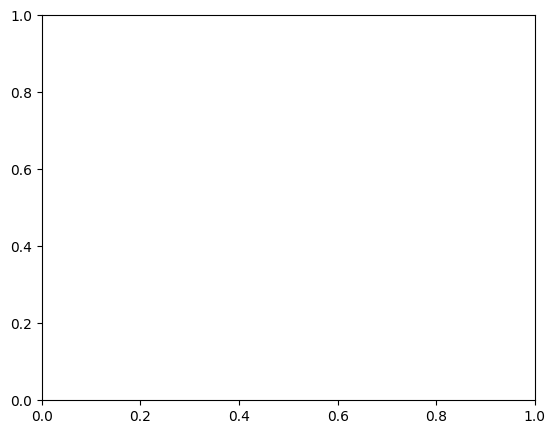

In [141]:
# Plot training history
plt.figure(figsize=(14, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model Loss During Training', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE', linewidth=2)
plt.plot(history.history['val_mae'], label='Validation MAE', linewidth=2)
plt.title('Model MAE During Training', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 Training completed in {len(history.history['loss'])} epochs")

In [ ]:
# Evaluate Neural Network on test set
print("📊 Evaluating Neural Network on test set...")

y_pred_nn = ffnn_model.predict(X_test_scaled, verbose=0).flatten()

# Evaluate
nn_results = evaluate_model(y_test, y_pred_nn, "Neural Network (FFNN)")

print(f"\n💡 Interpretation:")
print(f"   - On average, predictions are off by {nn_results['MAE']:.2f} points")
print(f"   - Model explains {nn_results['R2']*100:.2f}% of variance in upcoming points")

### Model Comparison and Results

In [ ]:
# Compare all models
results_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost' if xgb_available else 'XGBoost (N/A)', 'Neural Network'],
    'MAE': [lr_results['MAE'], rf_results['MAE'], xgb_results['MAE'] if xgb_results else np.nan, nn_results['MAE']],
    'MSE': [lr_results['MSE'], rf_results['MSE'], xgb_results['MSE'] if xgb_results else np.nan, nn_results['MSE']],
    'RMSE': [lr_results['RMSE'], rf_results['RMSE'], xgb_results['RMSE'] if xgb_results else np.nan, nn_results['RMSE']],
    'R²': [lr_results['R2'], rf_results['R2'], xgb_results['R2'] if xgb_results else np.nan, nn_results['R2']]
})

# Drop XGBoost row if not available
if not xgb_available or xgb_results is None:
    results_comparison = results_comparison[results_comparison['Model'] != 'XGBoost (N/A)']

print("\n" + "="*80)
print("🏆 MODEL COMPARISON - ALL METRICS")
print("="*80)
print(results_comparison.to_string(index=False))
print("="*80)

# Find best model for each metric
print("\n🥇 Best Models by Metric:")
print(f"   Lowest MAE:   {results_comparison.loc[results_comparison['MAE'].idxmin(), 'Model']} ({results_comparison['MAE'].min():.4f})")
print(f"   Lowest RMSE:  {results_comparison.loc[results_comparison['RMSE'].idxmin(), 'Model']} ({results_comparison['RMSE'].min():.4f})")
print(f"   Highest R²:   {results_comparison.loc[results_comparison['R²'].idxmax(), 'Model']} ({results_comparison['R²'].max():.4f})")